In [1]:
%matplotlib inline

In [2]:
%reload_ext autoreload
%autoreload 2

In [63]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.feature import hog

from classifier import Classifier
from detection import make_heatmap, get_hog_features, _transform_to_color_space
from process import Process

### Visualizations

In [64]:
def hog_(image):
    img = mpimg.imread(image)
    img = _transform_to_color_space(img, 'YCrCb')
    
    val = get_hog_features(img[:, :, 0],
                     orient=8, pix_per_cell=8, cell_per_block=2, vis=True, feature_vec=False)
    plt.imshow(val[1])
    
def show_image(image):
    plt.imshow(mpimg.imread(image))

In [60]:
car = '/Users/amir.ziai/Downloads/vehicles/GTI_Far/image0001.png'
non_car = '/Users/amir.ziai/Downloads/non-vehicles/GTI/image2.png'

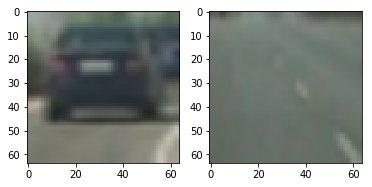

In [19]:
plt.subplot(121)
plt.imshow(mpimg.imread(car))
plt.subplot(122)
plt.imshow(mpimg.imread(non_car));

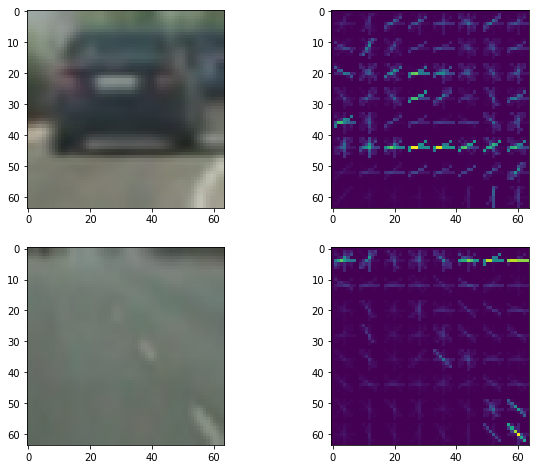

In [65]:
plt.figure(figsize=(10, 8))
plt.subplot(221)
show_image(car)
plt.subplot(222)
hog_(car)
plt.subplot(223)
show_image(non_car)
plt.subplot(224)
hog_(non_car)

In [148]:
from detection import draw_boxes, average_boxes, Window, combine_boxes
import numpy as np

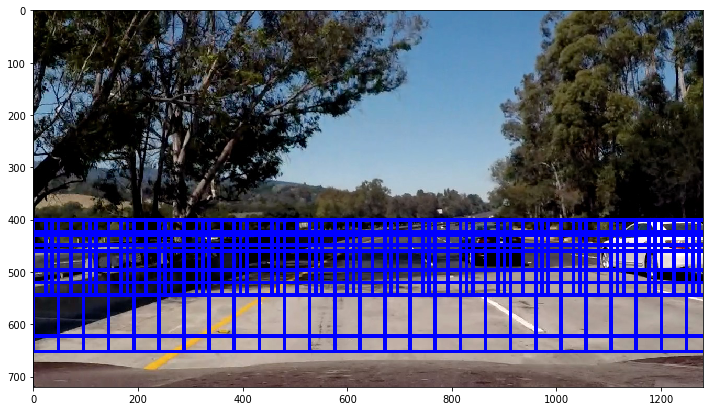

In [149]:
windows = process._find_likely_windows(pic)
plt.figure(figsize=(12, 8))
plt.imshow(draw_boxes(pic, windows))

In [173]:
def get_pic(x):
    pic = plt.imread(image_path.replace('6', str(x)))
    process = Process()
    draw_image = np.copy(pic)
    image = process._normalize(pic)
    likely_windows = process._find_likely_windows(image)
    likely_windows = combine_boxes(likely_windows, image.shape)
    results, process.window.score = average_boxes(likely_windows, process.window.score, image.shape)
    draw_image = draw_boxes(draw_image, likely_windows, color=(255, 0, 0), thick=6)
    plt.imshow(draw_image)

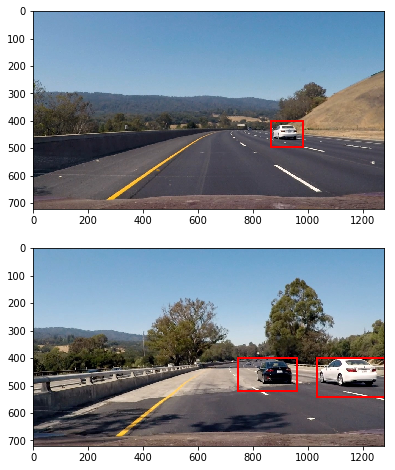

In [175]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
get_pic(3)
plt.subplot(2, 1, 2)
get_pic(4)

In [177]:
def get_pic_by_id(x):
    return plt.imread(image_path.replace('6', str(x)))

In [200]:
process = Process()

In [201]:
for i in range(1, 5 + 1):
    process.process_image(get_pic_by_id(i), True)

In [202]:
image = get_pic_by_id(6)

In [203]:
draw_image = np.copy(image)
image = process._normalize(image)
likely_windows = process._find_likely_windows(image)
likely_windows = combine_boxes(likely_windows, image.shape)

# results, self.window.score = average_boxes(likely_windows, self.window.score, image.shape)

In [204]:
target_windows = likely_windows
old_boxes = process.window.score
image_shape = image.shape

In [214]:
from detection import find_center_box, add_center_box, find_windows

In [206]:
target_boxes = find_center_box(target_windows)
new_boxes = add_center_box(target_boxes, old_boxes)

filtered_boxes = [new_box for new_box in new_boxes if new_box[-1] > 2]

new_windows = [
    ((int(new_center[0] - new_width), int(new_center[1] - new_height)),
     (int(new_center[0] + new_width), int(new_center[1] + new_height)))
    for new_center, new_width, new_height, new_move, new_score in filtered_boxes
]

heat_map = make_heatmap(new_windows, image_shape)
if np.unique(heat_map)[-1] >= 2:
    labels = ndi.label(heat_map)[0]
    n = np.copy(labels)
    heat_map_2nd = np.zeros_like(heat_map)
    heat_map_2nd[heat_map >= 2] = 1
    labels_2 = ndi.label(heat_map_2nd)
    for index in range(1, labels_2[1] + 1):
        nonzero = (labels_2[0] == index).nonzero()
        num = labels[nonzero[0][0], nonzero[1][0]]
        labels[labels == num] = 0
    heat_map = labels + heat_map_2nd
    new_windows = find_windows(heat_map)

In [209]:
from scipy import ndimage as ndi

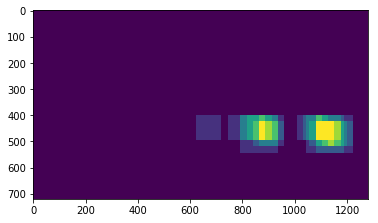

In [207]:
plt.imshow(labels)

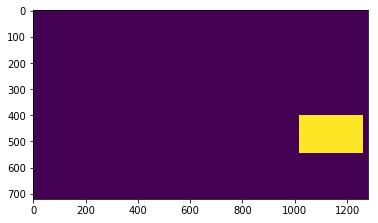

In [212]:
plt.imshow(ndi.label(heat_map)[0])

In [215]:
labels = ndi.label(heat_map)[0]
n = np.copy(labels)
heat_map_2nd = np.zeros_like(heat_map)
heat_map_2nd[heat_map >= 2] = 1
labels_2 = ndi.label(heat_map_2nd)
for index in range(1, labels_2[1] + 1):
    nonzero = (labels_2[0] == index).nonzero()
    num = labels[nonzero[0][0], nonzero[1][0]]
    labels[labels == num] = 0
heat_map = labels + heat_map_2nd
new_windows = find_windows(heat_map)

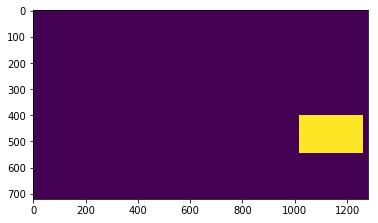

In [219]:
plt.imshow(labels)

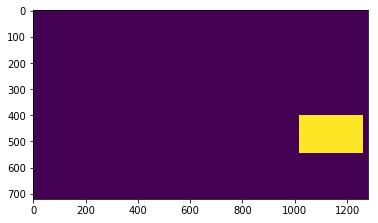

In [220]:
plt.imshow(heat_map)

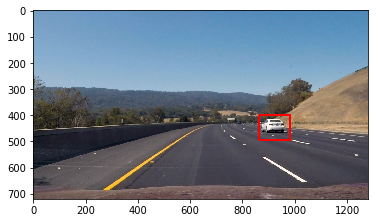

In [135]:
bounding_boxes = draw_boxes(draw_image, results, color=(0, 0, 255), thick=3)

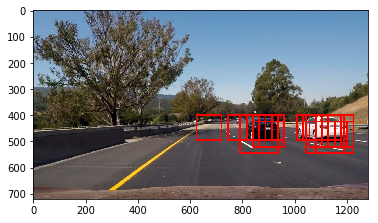

In [136]:
plt.imshow(bounding_boxes)

# Create features and train the classifier

### Features

In [42]:
clf = Classifier()
clf.create_features()
clf.load_features()

Vehicles     : 8792
Non-vehicles : 8968
Using 8 orientations 8 pixels per cell 2 cells per block
Feature vector length: 14208
Pickling features


### Model

In [61]:
clf.create_model()

Training time : 14s
Test accuracy : 99.16%
Pickling model


### Process test images

In [9]:
process = Process()
processor_function = process.process_image

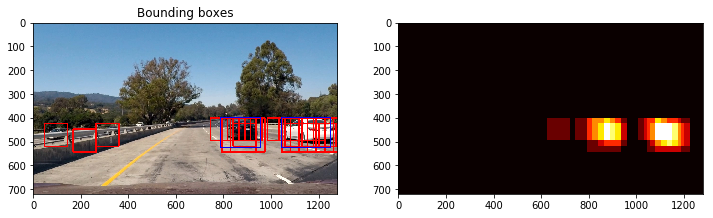

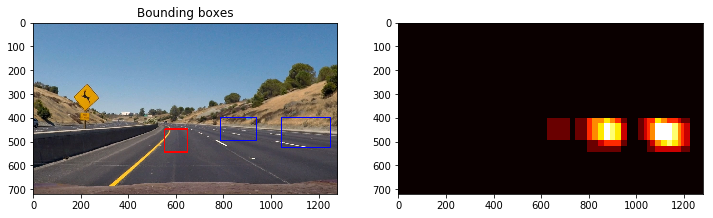

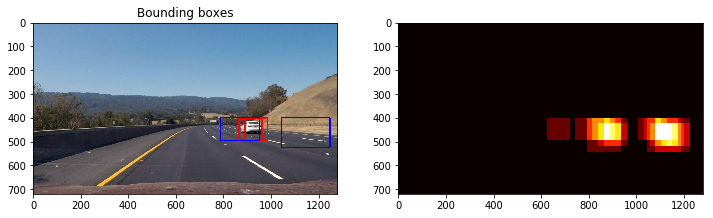

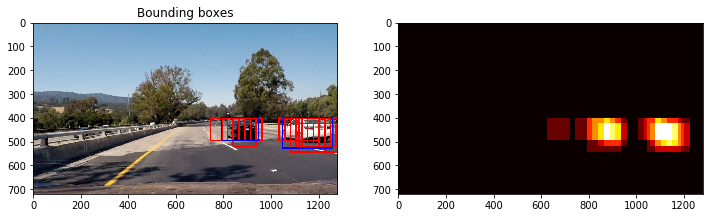

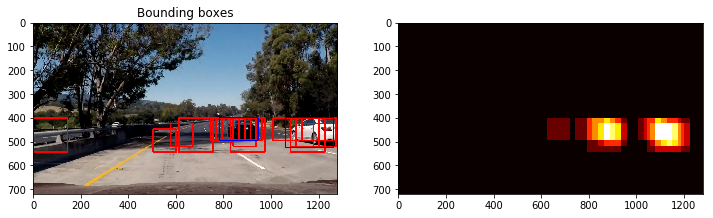

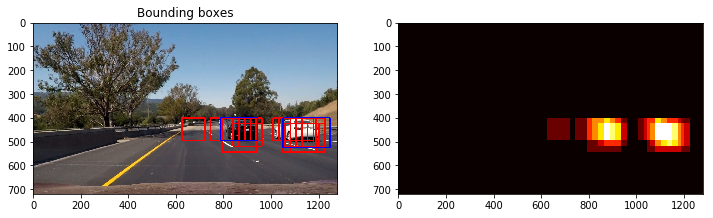

In [75]:
for i in range(1, 6 + 1):
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    image_path = 'test_images/test{}.jpg'.format(i)
    image = mpimg.imread(image_path)
    window_img, hot_windows = processor_function(image)
    plt.imshow(window_img)
    plt.title("Bounding boxes")
    plt.subplot(1, 2, 2)
    plt.imshow(labels, cmap='hot')
    ax1.set_title("Bounding boxes")

### Process video

In [120]:
process.process_video()

[MoviePy] >>>> Building video project_video_processed.mp4
[MoviePy] Writing video project_video_processed.mp4


100%|█████████▉| 1260/1261 [22:00<00:01,  1.04s/it]    | 1/1261 [00:01<21:56,  1.04s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_processed.mp4 

